<a href="https://colab.research.google.com/github/Ashutosh-Choubey/SER-Web_dev/blob/main/Main_pp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
# Choose the kaggle.json file that you downloaded
files.upload()
! mkdir ~/.kaggle
#  Make directory named kaggle and copy kaggle.json file there.
! cp kaggle.json ~/.kaggle/
# Change the permissions of the file.
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

 96% 414M/429M [00:03<00:00, 151MB/s]
100% 429M/429M [00:03<00:00, 118MB/s]


In [ ]:
ls

kaggle.json  ravdess-emotional-speech-audio.zip  sample_data/


In [ ]:
!mkdir SER

In [ ]:
!unzip ravdess-emotional-speech-audio.zip -d SER

Archive:  ravdess-emotional-speech-audio.zip
  inflating: SER/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: SER/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: SER/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: SER/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: SER/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: SER/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: SER/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: SER/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: SER/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: SER/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: SER/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: SER/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: SER/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: SER/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: SER/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: SER/Actor_01/03-01-03-01-02-02-01.wav  
  inflating: SER/Actor_01/03-01-03-02-01-01-01.wav  
  inflating: SER/Actor_01/03-01-03-02-01-02-01.wav  
 

In [ ]:
import pandas as pd


In [ ]:
df=pd.DataFrame()

In [ ]:
import os
for f in os.listdir("SER"):
  print(f)
  if(f!="audio_speech_actors_01-24"):
    for i in os.listdir("SER/"+f):
      k=i.split(".")[0] 
      k=k.split("-") 
      emotion=k[2]
      rep=k[5]
      if(int(k[6])%2==0):
        gender=1 #female
      else:
        gender=0 #male
      
      #if(rep!='02'):
      ls=[[i,gender,emotion]]
      df=df.append(ls,ignore_index=True)
      print(k)
      print(emotion,rep,gender)
      

Actor_10
['03', '01', '07', '02', '02', '01', '10']
07 01 1
['03', '01', '02', '01', '01', '02', '10']
02 02 1
['03', '01', '06', '02', '02', '02', '10']
06 02 1
['03', '01', '05', '01', '01', '02', '10']
05 02 1
['03', '01', '02', '02', '02', '02', '10']
02 02 1
['03', '01', '03', '02', '01', '01', '10']
03 01 1
['03', '01', '04', '01', '02', '02', '10']
04 02 1
['03', '01', '08', '01', '01', '01', '10']
08 01 1
['03', '01', '07', '02', '01', '02', '10']
07 02 1
['03', '01', '05', '02', '01', '02', '10']
05 02 1
['03', '01', '05', '01', '02', '01', '10']
05 01 1
['03', '01', '03', '01', '02', '02', '10']
03 02 1
['03', '01', '07', '02', '01', '01', '10']
07 01 1
['03', '01', '08', '02', '02', '01', '10']
08 01 1
['03', '01', '01', '01', '01', '02', '10']
01 02 1
['03', '01', '04', '02', '01', '01', '10']
04 01 1
['03', '01', '05', '02', '02', '02', '10']
05 02 1
['03', '01', '06', '01', '02', '02', '10']
06 02 1
['03', '01', '08', '02', '01', '02', '10']
08 02 1
['03', '01', '05', '01

In [ ]:
df.columns=['FName','Gender','Emotion']

In [ ]:
df

,FName,Gender,Emotion
0,03-01-07-02-02-01-10.wav,1,07
1,03-01-02-01-01-02-10.wav,1,02
2,03-01-06-02-02-02-10.wav,1,06
3,03-01-05-01-01-02-10.wav,1,05
4,03-01-02-02-02-02-10.wav,1,02
...,...,...,...
1435,03-01-07-01-01-01-13.wav,0,07
1436,03-01-04-01-02-02-13.wav,0,04
1437,03-01-07-02-01-02-13.wav,0,07
1438,03-01-04-01-01-02-13.wav,0,04


AxesSubplot(0.125,0.125;0.775x0.755)
05    192
06    192
07    192
04    192
03    192
08    192
02    192
01     96
Name: Emotion, dtype: int64


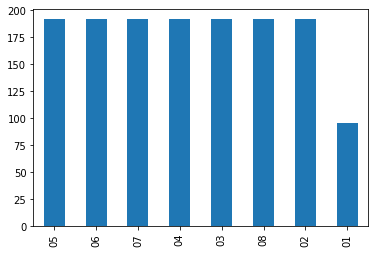

In [ ]:
print(df['Emotion'].value_counts().plot(kind = 'bar'))
print(df['Emotion'].value_counts())


In [ ]:
import librosa
import numpy as np

In [ ]:
df2=pd.DataFrame()

In [ ]:
for i in range(len(df)):
  k=df.iloc[i,0]
  n=k.split('-')
  X,sample_rate=librosa.load('/content/SER/Actor_'+n[6].split('.')[0]+'/'+k)
  sample_rate=np.array(sample_rate)
  #mfccs=librosa.feature.mfcc(y=X,n_mfcc=20)
  mfccs=np.mean(librosa.feature.mfcc(y=X,n_mfcc=20),axis=0)
  feature=mfccs
  df2=df2.append([-(feature/100)],ignore_index=True)

In [ ]:
df2['Emotion']=df['Emotion']

In [ ]:
df2=df2.dropna(axis=1)

In [ ]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,Emotion
0,0.325698,0.317815,0.307372,0.292306,0.290969,0.298201,0.320169,0.310243,0.320818,0.327321,0.333793,0.325344,0.319378,0.315379,0.315332,0.334391,0.333529,0.312483,0.317813,0.309633,0.314962,0.315731,0.314500,0.302637,0.289118,0.293375,0.298179,0.304422,0.305306,0.310782,0.297537,0.305579,0.343224,0.324846,0.311734,0.314850,0.318583,0.310211,0.306243,0.307043,...,0.252752,0.256174,0.249569,0.269306,0.295166,0.299422,0.285658,0.279038,0.289041,0.283593,0.270693,0.269834,0.258665,0.208260,0.209659,0.239057,0.254635,0.252852,0.234516,0.242487,0.245401,0.234445,0.244761,0.256260,0.243996,0.249379,0.255872,0.276187,0.264561,0.212851,0.166038,0.175262,0.224241,0.254772,0.265173,0.267564,0.269813,0.273187,0.282407,07
1,0.315700,0.314359,0.308826,0.297207,0.296260,0.303939,0.317542,0.315456,0.305694,0.314878,0.326365,0.303195,0.296317,0.306969,0.317422,0.326357,0.317575,0.304325,0.307152,0.319536,0.339598,0.339255,0.321116,0.308844,0.308589,0.297012,0.307223,0.285774,0.259298,0.248172,0.256118,0.265394,0.260961,0.262724,0.260862,0.271453,0.287925,0.283064,0.283734,0.292959,...,0.213977,0.227298,0.207611,0.223502,0.225053,0.206843,0.210147,0.220533,0.182975,0.175196,0.206436,0.228795,0.250657,0.240364,0.237917,0.247876,0.241045,0.242730,0.248636,0.258885,0.256854,0.252507,0.250611,0.247868,0.253336,0.251583,0.279263,0.285661,0.289462,0.306403,0.298526,0.289671,0.313105,0.315693,0.303760,0.314399,0.325041,0.297361,0.291249,02
2,0.313701,0.310207,0.319375,0.309624,0.304562,0.295154,0.302845,0.310784,0.297994,0.301789,0.316113,0.306932,0.316683,0.326712,0.312682,0.306548,0.313550,0.312607,0.317122,0.315433,0.306578,0.307014,0.316962,0.318286,0.304070,0.314528,0.317688,0.304065,0.285194,0.277242,0.275768,0.271719,0.286029,0.308905,0.296769,0.294891,0.315215,0.324526,0.320395,0.325650,...,0.266992,0.261543,0.247505,0.258913,0.286209,0.285730,0.279653,0.266432,0.284447,0.290774,0.276091,0.280993,0.274659,0.248922,0.261097,0.280100,0.290165,0.304057,0.298508,0.277000,0.206261,0.193071,0.215825,0.243375,0.257838,0.268584,0.271703,0.266208,0.267922,0.260531,0.251192,0.247440,0.240431,0.250002,0.260691,0.276160,0.288274,0.293979,0.299483,06
3,0.283347,0.280901,0.263950,0.267206,0.289812,0.297373,0.297516,0.305200,0.309286,0.304297,0.310598,0.295269,0.294474,0.301713,0.294669,0.283157,0.286505,0.290373,0.300853,0.307305,0.302940,0.291495,0.289259,0.308699,0.298333,0.290608,0.295846,0.303717,0.288588,0.285789,0.304260,0.299994,0.276122,0.270647,0.289296,0.298616,0.289098,0.288678,0.286756,0.277303,...,0.183033,0.170702,0.171350,0.179294,0.196505,0.207722,0.218831,0.230196,0.233529,0.238830,0.233573,0.198316,0.146919,0.142658,0.184236,0.207943,0.212112,0.207784,0.205441,0.220212,0.222458,0.224794,0.205558,0.218032,0.230672,0.206787,0.220202,0.257150,0.268808,0.270242,0.287076,0.297312,0.283568,0.262722,0.240708,0.232178,0.226365,0.197825,0.178869,05
4,0.315583,0.303760,0.302313,0.316871,0.317175,0.322103,0.319229,0.325680,0.324579,0.318288,0.327281,0.317589,0.325054,0.328587,0.321437,0.311551,0.300273,0.313244,0.342403,0.323436,0.311762,0.320748,0.329387,0.332028,0.337740,0.335891,0.322079,0.331452,0.324333,0.302709,0.290648,0.288195,0.300067,0.295804,0.295726,0.299115,0.297896,0.303851,0.307366,0.303517,...,0.277313,0.278942,0.286884,0.287038,0.275579,0.258345,0.223176,0.219932,0.236688,0.242567,0.259376,0.247348,0.244951,0.245259,0.251647,0.253009,0.248197,0.234895,0.244172,0.249342,0.231401,0.225700,0.237805,0.253289,0.270956,0.262538,0.258428,0.254059,0.253430,0.261731,0.273942,0.261819,0.259915,0.269531,0.269724,0.259483,0.271410,0.272375,0.275285,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(df2,test_size=0.2,random_state=0)

In [ ]:
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,Emotion
512,0.291166,0.304199,0.304967,0.303116,0.313874,0.317336,0.313025,0.316205,0.342608,0.342495,0.339780,0.330690,0.341481,0.340353,0.350847,0.359351,0.348727,0.352507,0.362061,0.365580,0.368870,0.348706,0.328093,0.329411,0.345437,0.341546,0.346573,0.363973,0.373767,0.378463,0.373387,0.383491,0.386950,0.355542,0.335244,0.335355,0.355008,0.367103,0.368442,0.360178,...,0.217261,0.213769,0.222688,0.227463,0.238500,0.238413,0.233118,0.229907,0.236634,0.237800,0.243895,0.236710,0.222475,0.223465,0.233019,0.243896,0.258648,0.263648,0.266148,0.269518,0.255644,0.245496,0.248626,0.262703,0.277644,0.287213,0.290145,0.275178,0.264654,0.268136,0.266599,0.280298,0.297494,0.306120,0.306658,0.317786,0.332409,0.352213,0.364355,07
482,0.442909,0.441079,0.438890,0.433199,0.430725,0.426386,0.413812,0.403243,0.404568,0.403438,0.391263,0.393532,0.410560,0.428822,0.426729,0.404593,0.386667,0.400032,0.391522,0.391243,0.402064,0.414108,0.415342,0.417764,0.430017,0.437553,0.437553,0.437553,0.437553,0.437553,0.437553,0.437553,0.437553,0.437553,0.437553,0.437553,0.437553,0.437553,0.437553,0.437553,...,0.319293,0.317096,0.293840,0.281708,0.260998,0.251908,0.264546,0.269011,0.276648,0.292437,0.285577,0.289716,0.296822,0.290734,0.288108,0.285603,0.277738,0.281667,0.273895,0.256827,0.278198,0.316027,0.313900,0.310544,0.320882,0.320433,0.297220,0.299693,0.302494,0.287686,0.285640,0.285432,0.285424,0.282527,0.292093,0.295914,0.305700,0.320142,0.333346,02
1050,0.364148,0.364148,0.364148,0.364148,0.364148,0.364148,0.363328,0.351981,0.359959,0.364148,0.360519,0.347170,0.329640,0.338010,0.350545,0.329642,0.317770,0.320308,0.337027,0.331590,0.327532,0.328658,0.339344,0.329682,0.325264,0.331718,0.325875,0.321969,0.328780,0.323755,0.325543,0.343416,0.350612,0.349102,0.352514,0.346003,0.347291,0.361424,0.357548,0.338927,...,0.283248,0.290372,0.282754,0.288191,0.307381,0.293358,0.273229,0.272536,0.268905,0.265505,0.279418,0.281294,0.275524,0.281574,0.274672,0.276821,0.272892,0.269801,0.278767,0.280531,0.285528,0.301177,0.309110,0.317323,0.319140,0.313585,0.316895,0.302572,0.296204,0.286798,0.274261,0.276264,0.270659,0.277737,0.285770,0.281610,0.295038,0.310510,0.302081,07
670,0.306047,0.295778,0.282707,0.279227,0.280222,0.286377,0.296944,0.299041,0.305022,0.294765,0.298164,0.309215,0.303983,0.297185,0.311992,0.312721,0.306568,0.304015,0.303652,0.308580,0.312721,0.312721,0.309229,0.309742,0.312721,0.312721,0.312721,0.312721,0.312193,0.301477,0.300291,0.311025,0.310857,0.299004,0.305030,0.312721,0.308853,0.302123,0.296315,0.273031,...,0.142319,0.153386,0.158965,0.159912,0.152663,0.166616,0.152100,0.093429,0.075617,0.099263,0.130494,0.136906,0.150189,0.170996,0.165366,0.165875,0.170520,0.163027,0.160363,0.166565,0.176279,0.175362,0.167662,0.168490,0.182538,0.201414,0.225880,0.240386,0.257693,0.261426,0.266399,0.266370,0.265202,0.272690,0.281485,0.278542,0.261873,0.263689,0.278097,05
1239,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.299976,0.300109,0.300112,0.299319,0.298946,0.298143,0.297077,0.296770,0.299365,0.288417,0.243971,...,0.241127,0.243860,0.243963,0.258789,0.251149,0.244128,0.235080,0.182164,0.113466,0.108885,0.139109,0.171435,0.197778,0.206672,0.208267,0.223890,0.202462,0.186875,0.184611,0.203060,0.244524,0.235172,0.187327,0.148727,0.147852,0.178043,0.198787,0.212656,0.237734,0.215436,0.205436,0.196441,0.171973,0.164067,0.175840,0.201985,0.212795,0.216670,0.201793,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

AxesSubplot(0.125,0.125;0.775x0.755)
02    163
03    161
06    157
05    153
08    150
07    148
04    147
01     73
Name: Emotion, dtype: int64


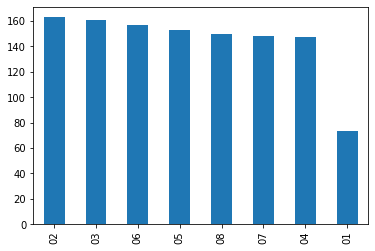

In [ ]:
print(df_train['Emotion'].value_counts().plot(kind = 'bar'))
print(df_train['Emotion'].value_counts())

In [ ]:
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,Emotion
34,0.250078,0.250101,0.250087,0.250057,0.249574,0.242471,0.248699,0.249356,0.248286,0.249884,0.248088,0.249846,0.249783,0.250108,0.246421,0.246759,0.246030,0.240588,0.250108,0.250108,0.250037,0.250108,0.249609,0.249204,0.249583,0.246366,0.250108,0.250108,0.250108,0.250108,0.248446,0.250108,0.250108,0.250108,0.250108,0.250108,0.248621,0.245507,0.245340,0.244275,...,0.161539,0.147650,0.116513,0.126602,0.149984,0.191208,0.189890,0.148697,0.155078,0.158833,0.187551,0.196965,0.208149,0.221601,0.237424,0.262395,0.271096,0.253863,0.172521,0.121537,0.133458,0.172558,0.182009,0.188447,0.198353,0.214651,0.202211,0.192858,0.173154,0.182953,0.218568,0.168127,0.121415,0.123478,0.169852,0.194128,0.227606,0.238039,0.240501,05
1061,0.411346,0.411346,0.411346,0.411346,0.408054,0.405744,0.367896,0.362249,0.372456,0.354945,0.344513,0.345961,0.354338,0.355040,0.352570,0.345321,0.341693,0.334598,0.338436,0.333818,0.346071,0.346451,0.333042,0.319897,0.320655,0.331457,0.334747,0.341246,0.348917,0.355354,0.355210,0.358070,0.363018,0.349630,0.342994,0.365704,0.399611,0.393083,0.380653,0.396277,...,0.280297,0.279016,0.272905,0.291719,0.299214,0.285722,0.283792,0.281076,0.296302,0.305408,0.274484,0.240435,0.238498,0.266959,0.282440,0.282713,0.288189,0.292663,0.290376,0.304903,0.311167,0.288492,0.283541,0.296987,0.306443,0.308074,0.292116,0.287058,0.304702,0.320770,0.322053,0.311067,0.318061,0.316289,0.321006,0.339794,0.343887,0.341532,0.336207,04
1256,0.288812,0.288812,0.288812,0.288812,0.288812,0.288812,0.288812,0.288812,0.288812,0.288812,0.288812,0.288812,0.288812,0.288812,0.288812,0.288816,0.288846,0.285314,0.272515,0.266106,0.259424,0.255441,0.264941,0.255898,0.251553,0.252589,0.262572,0.272475,0.269841,0.267590,0.264745,0.255678,0.245387,0.246480,0.248778,0.255032,0.288568,0.289391,0.288812,0.288812,...,0.193441,0.250923,0.253146,0.177449,0.154650,0.159850,0.188511,0.192883,0.187181,0.196668,0.219072,0.221037,0.237046,0.252035,0.257067,0.258766,0.237050,0.225171,0.219393,0.221332,0.210032,0.208783,0.213182,0.208205,0.224906,0.229722,0.214545,0.206452,0.188549,0.183162,0.199619,0.211337,0.214839,0.219266,0.234598,0.257190,0.267241,0.254040,0.247392,06
333,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.385083,0.380192,0.361500,0.341889,0.344641,0.355573,0.352898,0.358067,0.358981,0.368287,0.384484,0.385083,0.385083,0.385083,0.385083,0.362418,...,0.283283,0.293698,0.269071,0.240729,0.223366,0.200291,0.189827,0.200683,0.214310,0.234688,0.249251,0.267393,0.284714,0.296714,0.322590,0.323816,0.315187,0.324569,0.330063,0.321501,0.313386,0.310713,0.313319,0.319317,0.329697,0.320085,0.316341,0.307081,0.295082,0.294784,0.291958,0.301807,0.314147,0.321099,0.320948,0.322230,0.335175,0.364233,0.368075,08
141,0.414825,0.414825,0.414825,0.414825,0.411737,0.407883,0.414825,0.414825,0.414825,0.389710,0.373288,0.389411,0.396089,0.413231,0.414825,0.414825,0.414825,0.414825,0.414825,0.414825,0.414825,0.414825,0.414825,0.414825,0.414825,0.414825,0.413515,0.407298,0.413712,0.398918,0.349776,0.308281,0.306557,0.341868,0.352246,0.364946,0.400347,0.407244,0.414825,0.414825,...,0.259306,0.277732,0.283057,0.283135,0.287649,0.301103,0.309816,0.313507,0.334404,0.349763,0.363198,0.356276,0.377295,0.393438,0.380754,0.362606,0.355908,0.349192,0.352931,0.374143,0.373079,0.353183,0.358678,0.381635,0.384558,0.410362,0.414825,0.414825,0.414825,0.370711,0.336388,0.341852,0.346476,0.227749,0.172221,0.167267,0.180402,0.184463,0.191214,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

04    45
07    44
08    42
05    39
06    35
03    31
02    29
01    23
Name: Emotion, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


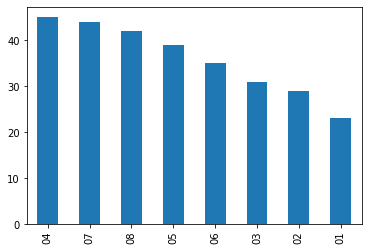

In [ ]:
print(df_test['Emotion'].value_counts())
print(df_test['Emotion'].value_counts().plot(kind = 'bar'))

In [ ]:
y_train=df_train['Emotion']
x_train=df_train.drop('Emotion',axis=1)

In [ ]:
y_test=df_test['Emotion']
x_test=df_test.drop('Emotion',axis=1)

In [ ]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
x_test=x_test.to_numpy()
x_train=x_train.to_numpy()

In [ ]:
Y_train=np.zeros((x_train.shape[0],8))
for i in range(y_train.shape[0]):
  Y_train[i][int(y_train[i])-1]=1

In [ ]:
Y_test=np.zeros((x_test.shape[0],8))
for i in range(y_test.shape[0]):
  Y_test[i][int(y_test[i])-1]=1

In [ ]:
y_train=Y_train
y_test=Y_test
y_train.shape

(1152, 8)

In [ ]:
x_train.shape

(1152, 127)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import Dropout

# **SIMPLE NEURAL NETWORK MODELS**

# MODEL 1

In [ ]:
#Nh=hidden layer neurons, Ni= input layer neurons, No= output layer neurons
#Ni=130, No=8
# Nh=2/3 * Ni + No
model2=Sequential()
model2.add(Dense(130,activation='relu'))
model2.add(Dense(96,activation='relu'))
model2.add(Dense(72,activation='relu'))
model2.add(Dense(56,activation='relu'))
model2.add(Dense(8,activation='softmax'))
model2.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
model2.fit(x_train,y_train,epochs=400,batch_size=10)

Epoch 1/400
116/116 [==============================] - 1s 2ms/step - loss: 2.0723 - accuracy: 0.1397
Epoch 2/400
116/116 [==============================] - 0s 2ms/step - loss: 2.0639 - accuracy: 0.1376
Epoch 3/400
116/116 [==============================] - 0s 2ms/step - loss: 2.0566 - accuracy: 0.1329
Epoch 4/400
116/116 [==============================] - 0s 2ms/step - loss: 2.0603 - accuracy: 0.1579
Epoch 5/400
116/116 [==============================] - 0s 2ms/step - loss: 2.0366 - accuracy: 0.1754
Epoch 6/400
116/116 [==============================] - 0s 2ms/step - loss: 2.0101 - accuracy: 0.1968
Epoch 7/400
116/116 [==============================] - 0s 2ms/step - loss: 1.9938 - accuracy: 0.2223
Epoch 8/400
116/116 [==============================] - 0s 2ms/step - loss: 1.9615 - accuracy: 0.2175
Epoch 9/400
116/116 [==============================] - 0s 2ms/step - loss: 1.9201 - accuracy: 0.2377
Epoch 10/400
116/116 [==============================] - 0s 2ms/step - loss: 1.9029 - accura

In [ ]:
model2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4.3806 - accuracy: 0.2674


[4.380608081817627, 0.2673611044883728]

## Graphical Representation

In [ ]:
b=model2.predict(x_test)

In [ ]:
ls=[]
for i in b:
  ls.append(np.argmax(i)+1)
print(ls)

[3, 3, 4, 8, 8, 8, 5, 2, 3, 3, 8, 5, 7, 2, 8, 6, 7, 3, 8, 2, 2, 3, 4, 6, 4, 6, 1, 6, 3, 5, 2, 6, 8, 2, 2, 3, 6, 5, 8, 1, 1, 5, 6, 8, 1, 7, 2, 3, 7, 8, 4, 8, 5, 5, 3, 5, 3, 8, 3, 6, 5, 2, 3, 1, 1, 8, 7, 2, 8, 8, 2, 3, 8, 8, 7, 3, 3, 8, 7, 6, 3, 6, 5, 8, 3, 3, 7, 7, 8, 5, 8, 8, 7, 6, 4, 6, 2, 4, 5, 8, 7, 8, 7, 8, 2, 7, 6, 1, 2, 8, 7, 6, 8, 7, 8, 3, 7, 5, 6, 6, 4, 4, 7, 8, 8, 4, 3, 1, 8, 3, 8, 8, 3, 3, 3, 8, 1, 5, 6, 8, 7, 3, 5, 5]


In [ ]:
ls2=[]
for i in y_test:
  ls2.append(np.argmax(i)+1)
print(ls2)

[2, 7, 7, 3, 3, 3, 4, 4, 5, 7, 1, 5, 6, 2, 7, 6, 3, 6, 8, 5, 6, 8, 7, 5, 5, 8, 2, 3, 2, 5, 8, 8, 8, 2, 2, 7, 8, 5, 8, 6, 2, 3, 6, 5, 7, 3, 2, 7, 2, 4, 5, 3, 3, 6, 8, 6, 4, 1, 3, 7, 2, 6, 4, 1, 1, 3, 4, 7, 1, 5, 7, 6, 4, 7, 7, 4, 4, 6, 4, 2, 6, 6, 3, 8, 7, 3, 2, 5, 6, 3, 8, 3, 7, 6, 8, 3, 6, 4, 5, 3, 7, 1, 4, 6, 7, 7, 5, 7, 8, 5, 4, 3, 8, 1, 3, 8, 1, 5, 6, 3, 7, 4, 7, 4, 6, 4, 5, 4, 6, 4, 5, 3, 7, 5, 8, 1, 2, 6, 1, 8, 7, 1, 5, 4]


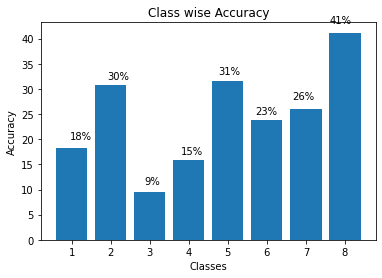

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ls2,ls)
cm = cm.astype('float') / cm.sum(axis=1)
cm.diagonal()
from matplotlib import pyplot as plt
plt.bar([1,2,3,4,5,6,7,8],cm.diagonal()*100)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title("Class wise Accuracy")
i=0
for p in (cm.diagonal()*100):
  i+=0.95
  plt.annotate(str(int(p))+'%', (i,int(p)+2))

## MODEL 2

In [ ]:
#Nh=hidden layer neurons, Ni= input layer neurons, No= output layer neurons
#Ni=130, No=8
# Nh=sqrt(Ni,No)
model3=Sequential()
model3.add(Dense(130,activation='tanh'))
model3.add(Dense(32,activation='tanh'))
model3.add(Dense(16,activation='tanh'))
model3.add(Dense(12,activation='tanh'))
model3.add(Dense(8,activation='softmax'))
model3.compile(loss="categorical_crossentropy",optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model3.fit(x_train,y_train,epochs=600,batch_size=10)

Epoch 1/600
116/116 [==============================] - 1s 1ms/step - loss: 2.1085 - accuracy: 0.1233
Epoch 2/600
116/116 [==============================] - 0s 1ms/step - loss: 2.0640 - accuracy: 0.1475
Epoch 3/600
116/116 [==============================] - 0s 1ms/step - loss: 2.0585 - accuracy: 0.1491
Epoch 4/600
116/116 [==============================] - 0s 1ms/step - loss: 2.0256 - accuracy: 0.1820
Epoch 5/600
116/116 [==============================] - 0s 1ms/step - loss: 1.9959 - accuracy: 0.1740
Epoch 6/600
116/116 [==============================] - 0s 1ms/step - loss: 1.9490 - accuracy: 0.2473
Epoch 7/600
116/116 [==============================] - 0s 1ms/step - loss: 1.9318 - accuracy: 0.2541
Epoch 8/600
116/116 [==============================] - 0s 1ms/step - loss: 1.9400 - accuracy: 0.2371
Epoch 9/600
116/116 [==============================] - 0s 1ms/step - loss: 1.8880 - accuracy: 0.2748
Epoch 10/600
116/116 [==============================] - 0s 1ms/step - loss: 1.8752 - accura

In [ ]:
model3.evaluate(x_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3.3255 - accuracy: 0.2847


[3.3254852294921875, 0.2847222089767456]

## Graphical Representation

In [ ]:
b=model3.predict(x_test)

In [ ]:
ls=[]
for i in b:
  ls.append(np.argmax(i)+1)
print(ls)

[2, 5, 4, 7, 4, 8, 8, 8, 5, 4, 7, 5, 2, 2, 7, 6, 7, 6, 8, 5, 7, 5, 7, 5, 5, 8, 7, 6, 7, 5, 5, 4, 8, 2, 2, 4, 5, 5, 4, 8, 4, 8, 5, 8, 8, 8, 2, 5, 7, 4, 7, 8, 5, 5, 4, 5, 2, 8, 5, 5, 5, 8, 8, 2, 4, 4, 7, 2, 4, 8, 2, 5, 8, 4, 2, 5, 4, 8, 2, 6, 2, 2, 5, 8, 6, 8, 2, 7, 8, 5, 8, 4, 2, 4, 8, 5, 7, 7, 5, 4, 7, 7, 2, 4, 5, 5, 5, 7, 5, 6, 3, 5, 8, 2, 8, 8, 3, 5, 8, 8, 7, 8, 7, 6, 8, 4, 5, 4, 6, 4, 5, 8, 4, 7, 2, 4, 2, 5, 5, 4, 7, 8, 5, 7]


In [ ]:
ls2=[]
for i in y_test:
  ls2.append(np.argmax(i)+1)
print(ls2)

[2, 7, 7, 3, 3, 3, 4, 4, 5, 7, 1, 5, 6, 2, 7, 6, 3, 6, 8, 5, 6, 8, 7, 5, 5, 8, 2, 3, 2, 5, 8, 8, 8, 2, 2, 7, 8, 5, 8, 6, 2, 3, 6, 5, 7, 3, 2, 7, 2, 4, 5, 3, 3, 6, 8, 6, 4, 1, 3, 7, 2, 6, 4, 1, 1, 3, 4, 7, 1, 5, 7, 6, 4, 7, 7, 4, 4, 6, 4, 2, 6, 6, 3, 8, 7, 3, 2, 5, 6, 3, 8, 3, 7, 6, 8, 3, 6, 4, 5, 3, 7, 1, 4, 6, 7, 7, 5, 7, 8, 5, 4, 3, 8, 1, 3, 8, 1, 5, 6, 3, 7, 4, 7, 4, 6, 4, 5, 4, 6, 4, 5, 3, 7, 5, 8, 1, 2, 6, 1, 8, 7, 1, 5, 4]


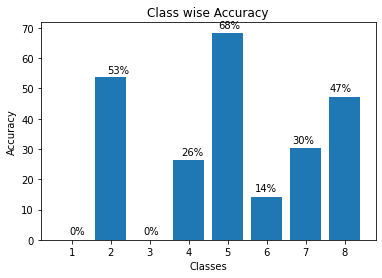

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ls2,ls)
cm = cm.astype('float') / cm.sum(axis=1)
cm.diagonal()
from matplotlib import pyplot as plt
plt.bar([1,2,3,4,5,6,7,8],cm.diagonal()*100)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title("Class wise Accuracy")
i=0
for p in (cm.diagonal()*100):
  i+=0.95
  plt.annotate(str(int(p))+'%', (i,int(p)+2))

# **BLSTM MODEL**

Reshaping input coz BLSTM requires 3-D input

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
#x_train=x_train.reshape(576,1,130)
#x_test=x_test.reshape(144,1,130)

## Model 1

In [ ]:
#Nh=hidden layer neurons, Ni= input layer neurons, No= output layer neurons
#Ni=130, No=8
# Nh=2/3 * Ni + No
model=Sequential()
model.add(Bidirectional(LSTM(130, return_sequences=True,activation='tanh')))
model.add(Bidirectional(LSTM(96, return_sequences=True, activation='tanh')))
#model.add(Bidirectional(LSTM(72, return_sequences=True, activation='tanh')))
model.add(Bidirectional(LSTM(72,activation='tanh',dropout=0.2)))
model.add(Dense(8, activation='softmax'))
model.compile(loss="categorical_crossentropy",optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.fit(x=x_train,y=y_train,epochs=100,batch_size=10) 

Epoch 1/100
116/116 [==============================] - 68s 482ms/step - loss: 2.0772 - accuracy: 0.1480
Epoch 2/100
116/116 [==============================] - 56s 483ms/step - loss: 1.9998 - accuracy: 0.1924
Epoch 3/100
116/116 [==============================] - 65s 563ms/step - loss: 1.9334 - accuracy: 0.2479
Epoch 4/100
116/116 [==============================] - 56s 484ms/step - loss: 1.9032 - accuracy: 0.2273
Epoch 5/100
116/116 [==============================] - 57s 492ms/step - loss: 1.8788 - accuracy: 0.2711
Epoch 6/100
116/116 [==============================] - 56s 483ms/step - loss: 1.8658 - accuracy: 0.2737
Epoch 7/100
116/116 [==============================] - 56s 483ms/step - loss: 1.9039 - accuracy: 0.2604
Epoch 8/100
116/116 [==============================] - 56s 482ms/step - loss: 1.9021 - accuracy: 0.2503
Epoch 9/100
116/116 [==============================] - 56s 484ms/step - loss: 1.8731 - accuracy: 0.2716
Epoch 10/100
116/116 [==============================] - 56s 481m

In [ ]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 4s 195ms/step - loss: 3.0144 - accuracy: 0.3438


[3.014376640319824, 0.34375]

## **Graphical representation**

In [ ]:
a=model.predict(x_test)

In [ ]:
ls=[]
for i in a:
  ls.append(np.argmax(i)+1)
print(ls)

[2, 2, 8, 4, 7, 3, 2, 1, 7, 6, 4, 5, 3, 7, 2, 4, 8, 6, 7, 7, 3, 8, 7, 5, 6, 1, 5, 6, 3, 2, 8, 6, 3, 2, 2, 6, 7, 2, 1, 3, 7, 4, 5, 2, 2, 4, 7, 3, 8, 6, 6, 8, 3, 7, 7, 8, 6, 6, 7, 7, 8, 8, 8, 8, 2, 8, 4, 3, 8, 3, 4, 3, 3, 4, 1, 4, 2, 6, 8, 8, 6, 3, 6, 7, 4, 3, 7, 5, 7, 6, 4, 8, 8, 7, 7, 4, 2, 8, 6, 6, 7, 2, 2, 7, 2, 7, 6, 8, 1, 1, 5, 1, 7, 8, 5, 1, 8, 4, 3, 1, 6, 5, 2, 7, 8, 6, 4, 7, 8, 7, 2, 2, 2, 7, 3, 7, 4, 2, 4, 1, 6, 8, 3, 2]


In [ ]:
ls2=[]
for i in y_test:
  ls2.append(np.argmax(i)+1)
print(ls2)

[2, 3, 8, 3, 4, 4, 2, 3, 8, 8, 4, 5, 7, 6, 7, 4, 4, 3, 6, 5, 3, 6, 2, 5, 3, 2, 3, 6, 1, 4, 3, 5, 8, 7, 7, 4, 4, 5, 1, 3, 4, 8, 5, 6, 6, 8, 8, 4, 3, 7, 6, 4, 3, 4, 5, 2, 6, 5, 7, 7, 7, 8, 6, 3, 2, 1, 6, 8, 5, 8, 4, 3, 7, 4, 8, 8, 5, 1, 3, 4, 4, 7, 1, 2, 7, 5, 4, 5, 2, 6, 7, 6, 7, 7, 3, 2, 7, 7, 3, 4, 5, 4, 7, 7, 5, 7, 5, 1, 1, 2, 3, 7, 4, 8, 3, 1, 2, 1, 8, 7, 4, 7, 7, 2, 3, 1, 4, 2, 4, 7, 2, 2, 2, 2, 1, 4, 2, 2, 1, 6, 3, 8, 4, 4]


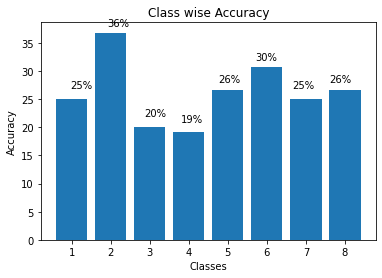

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ls2,ls)
cm = cm.astype('float') / cm.sum(axis=1)
cm.diagonal()
from matplotlib import pyplot as plt
plt.bar([1,2,3,4,5,6,7,8],cm.diagonal()*100)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title("Class wise Accuracy")
i=0
for p in (cm.diagonal()*100):
  i+=0.95
  plt.annotate(str(int(p))+'%', (i,int(p)+2))

## BLSTM MODEL 2 combination of blstm and SNN

In [ ]:
##This is not good, never try
model4=Sequential()
model4.add(Bidirectional(LSTM(130,return_sequences=True,activation='tanh')))
model4.add(Bidirectional(LSTM(96,return_sequences=True,activation='tanh')))
#model4.add(Bidirectional(LSTM(72,return_sequences=True,activation='tanh')))
#model4.add(Bidirectional(LSTM(56,return_sequences=True,activation='tanh')))
model4.add(Bidirectional(LSTM(72, activation='tanh')))
#model4.add(Dense(72,activation='tanh'))
model4.add(Dropout(0.2))
model4.add(Dense(56,activation='tanh'))
model4.add(Dense(46,activation='tanh'))
#model4.add(Dense(38,activation='tanh'))
#model4.add(Dense(33,activation='tanh'))
#model4.add(Dense(30,activation='tanh'))
#model4.add(Dense(28,activation='tanh'))
#model4.add(Dense(27,activation='tanh'))
#model4.add(Dense(26,activation='tanh'))
#model4.add(Dense(25,activation='tanh'))
#model4.add(Dropout(0.2))
model4.add(Dense(8, activation='softmax'))
model4.compile(loss="categorical_crossentropy",optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model4.fit(x=x_train,y=y_train,epochs=100,batch_size=10) 

Epoch 1/100
116/116 [==============================] - 69s 496ms/step - loss: 2.0820 - accuracy: 0.1182
Epoch 2/100
116/116 [==============================] - 58s 501ms/step - loss: 1.9535 - accuracy: 0.2629
Epoch 3/100
116/116 [==============================] - 58s 504ms/step - loss: 1.9285 - accuracy: 0.2741
Epoch 4/100
116/116 [==============================] - 58s 501ms/step - loss: 1.9295 - accuracy: 0.2597
Epoch 5/100
116/116 [==============================] - 58s 503ms/step - loss: 1.8934 - accuracy: 0.2521
Epoch 6/100
116/116 [==============================] - 58s 503ms/step - loss: 1.9093 - accuracy: 0.3003
Epoch 7/100
116/116 [==============================] - 58s 503ms/step - loss: 1.8905 - accuracy: 0.2644
Epoch 8/100
116/116 [==============================] - 58s 503ms/step - loss: 1.8694 - accuracy: 0.2972
Epoch 9/100
116/116 [==============================] - 58s 504ms/step - loss: 1.8822 - accuracy: 0.2929
Epoch 10/100
116/116 [==============================] - 59s 507m

In [ ]:
model4.evaluate(x_test,y_test)

5/5 [==============================] - 3s 142ms/step - loss: 2.1737 - accuracy: 0.2847


[2.173652410507202, 0.2847222089767456]

In [ ]:
a=model4.predict(x_test)
ls=[]
for i in a:
  ls.append(np.argmax(i)+1)
print(ls)
ls2=[]
for i in y_test:
  ls2.append(np.argmax(i)+1)
print(ls2)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ls2,ls)
cm = cm.astype('float') / cm.sum(axis=1)
cm.diagonal()
from matplotlib import pyplot as plt
plt.bar([1,2,3,4,5,6,7,8],cm.diagonal()*100)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title("Class wise Accuracy")
i=0
for p in (cm.diagonal()*100):
  i+=0.95
  plt.annotate(str(int(p))+'%', (i,int(p)+2))

NameError: ignored

# **BLSTM MODEL WITH** different input shape

In [ ]:
x_train=x_train.reshape(x_train.shape[0],1,x_train.shape[1])
x_test=x_test.reshape(x_test.shape[0],1,x_test.shape[1])

In [ ]:
#Nh=hidden layer neurons, Ni= input layer neurons, No= output layer neurons
#Ni=130, No=8
# Nh=2/3 * Ni + No
model5=Sequential()
model5.add(Bidirectional(LSTM(130,activation='tanh')))
#model5.add(Bidirectional(LSTM(96, return_sequences=True, activation='tanh')))
#model5.add(Bidirectional(LSTM(72, return_sequences=True, activation='tanh')))
#model5.add(Bidirectional(LSTM(56, return_sequences=True, activation='tanh')))
#model5.add(Bidirectional(LSTM(96,activation='tanh')))
model5.add(Dropout(0.2))
model5.add(Dense(8, activation='softmax'))
model5.compile(loss="categorical_crossentropy",optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model5.fit(x_train,y_train,batch_size=10,epochs=2000)

Epoch 1/2000
116/116 [==============================] - 5s 5ms/step - loss: 2.0884 - accuracy: 0.1054
Epoch 2/2000
116/116 [==============================] - 1s 5ms/step - loss: 2.0407 - accuracy: 0.1869
Epoch 3/2000
116/116 [==============================] - 1s 5ms/step - loss: 2.0187 - accuracy: 0.2013
Epoch 4/2000
116/116 [==============================] - 1s 6ms/step - loss: 1.9915 - accuracy: 0.2026
Epoch 5/2000
116/116 [==============================] - 1s 5ms/step - loss: 1.9779 - accuracy: 0.2330
Epoch 6/2000
116/116 [==============================] - 1s 5ms/step - loss: 1.9335 - accuracy: 0.2458
Epoch 7/2000
116/116 [==============================] - 1s 6ms/step - loss: 1.9249 - accuracy: 0.2412
Epoch 8/2000
116/116 [==============================] - 1s 6ms/step - loss: 1.9069 - accuracy: 0.2537
Epoch 9/2000
116/116 [==============================] - 1s 6ms/step - loss: 1.9055 - accuracy: 0.2648
Epoch 10/2000
116/116 [==============================] - 1s 6ms/step - loss: 1.885

In [ ]:
model5.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3.1744 - accuracy: 0.3160


[3.174351692199707, 0.3159722089767456]

## Graphical Representation

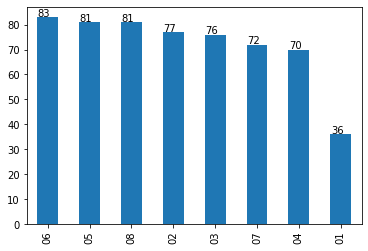

In [ ]:
ax=df_train['Emotion'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# **Combo-Dataset using BLSTM**





---









In [ ]:
from google.colab import files
# Choose the kaggle.json file that you downloaded
files.upload()
! mkdir ~/.kaggle
#  Make directory named kaggle and copy kaggle.json file there.
! cp kaggle.json ~/.kaggle/
# Change the permissions of the file.
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d cracc97/features

 90% 33.0M/36.8M [00:01<00:00, 18.6MB/s]
100% 36.8M/36.8M [00:01<00:00, 27.2MB/s]


In [ ]:
ls

features.zip  kaggle.json  sample_data/


In [ ]:
!mkdir SER

In [ ]:
!unzip features.zip -d SER

Archive:  features.zip
  inflating: SER/Female_features.csv  
  inflating: SER/Male_features.csv   


In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_csv('SER/Female_features.csv')
df2=pd.read_csv('SER/Male_features.csv')

In [ ]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,labels
0,-289.809753,92.656693,-9.069321,28.717079,-21.039324,17.089424,6.840908,2.121466,-3.511284,15.282769,-20.940063,-4.970372,4.148911,-2.176281,-10.612703,4.476055,-13.803677,14.175440,19.844715,22.104296,33.317879,15.179185,-2.551921,-0.456485,-9.676558,5.100345,-0.894269,-9.384500,-9.181895,-4.069016,-3.542435,2.621162,-9.586638,-10.657064,-2.194854,3.378405,-0.238241,1.255522,12.715047,10.090569,4.405659,-3.251812,1.517805,2.296752,0.187130,-3.017969,2.648015,-1.628743,-8.161646,0.410628,3.038790,-3.218719,-8.172455,-1.279505,0.784736,0.026448,5.271955,1.593226,fear
1,-164.861326,38.783154,7.857355,8.996727,-1.013209,3.851275,7.686239,-0.056528,2.177062,3.519324,-6.848114,-4.161277,3.273623,-4.277922,-6.333267,-3.213015,-4.107710,6.752303,13.073777,15.662759,19.859118,10.415630,1.885957,-0.430597,-4.784181,-1.788522,-0.596414,-5.382412,-4.713703,-3.808951,-5.590799,-2.691604,-2.198356,-5.007474,-2.021683,1.607595,-0.000486,4.024379,8.010472,4.766726,4.165703,1.615579,0.263691,1.096127,0.393805,-0.796563,-1.729946,-2.290383,-2.874403,-1.857293,-1.686885,-3.186002,-4.454954,-2.297687,0.460035,1.803904,3.517316,2.761219,fear
2,-318.005859,93.598946,-9.192831,28.330027,-18.755703,17.689783,8.995246,2.591334,-2.596031,14.429805,-20.727526,-5.147177,5.515956,-2.550470,-10.015228,3.873153,-12.491594,15.660821,20.358717,22.060354,33.145260,13.987285,-2.970943,-1.565406,-10.052460,4.410480,0.098426,-9.799510,-8.788031,-4.191149,-3.199091,2.625989,-9.437167,-9.364561,-0.956414,3.803706,0.186296,1.258381,13.400777,9.973382,3.156203,-4.480469,1.015607,2.440078,0.114277,-2.120422,3.337992,-2.200574,-8.636012,0.188661,3.093689,-3.041015,-8.063533,-1.698214,0.690736,0.127959,5.735998,1.630275,fear
3,-283.526459,98.361053,-6.772425,29.114161,-21.579048,16.470734,5.398855,0.355662,-5.227962,14.002400,-21.756216,-5.311449,3.629201,-2.528461,-10.608778,4.192544,-14.032937,13.708948,18.583170,19.931011,30.955484,13.939707,-2.120601,0.692817,-9.049863,5.009627,-0.776842,-8.995946,-8.704695,-3.946381,-3.819772,2.796542,-8.587075,-9.731030,-1.915447,3.136230,-0.423264,1.121960,12.127435,9.105770,3.469228,-3.484883,1.510928,2.367090,0.128847,-3.033276,2.560636,-1.608557,-7.842751,0.693084,3.549195,-2.875928,-7.984237,-1.225830,0.751644,-0.070933,5.084106,1.591205,fear
4,-304.320404,93.121078,-7.301482,26.026447,-17.520985,20.282223,9.499370,1.857130,3.026654,10.986577,-21.686266,1.154006,5.639572,-7.600457,-7.312739,2.738524,-3.725120,30.513594,21.853415,27.254601,21.214785,-3.944416,-6.274871,-3.827176,-4.168861,5.349032,-12.013853,-10.556020,-5.247499,-1.876473,-2.030713,-4.417187,-14.029795,1.401739,4.486490,3.891639,0.155805,13.939287,8.420757,0.203022,-4.648229,0.282139,2.176740,-1.542075,-3.622665,-0.856342,-2.483490,-7.919121,0.760834,0.380806,-7.223840,-6.260316,4.097248,5.165100,0.866827,4.163346,-1.483358,-1.034823,fear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49219,-484.104950,136.235703,4.260746,68.625694,-6.213493,21.335022,-9.983968,1.860038,-0.949390,-2.841661,11.052267,-6.787836,6.529388,-7.502655,1.125459,-7.148689,-6.529755,-2.599009,-9.555384,-0.237089,-7.755362,-0.331533,-1.288274,1.378114,0.200232,-1.066808,3.844149,0.631545,3.017887,1.150691,4.574457,1.726504,2.901028,1.599169,-0.280960,4.337039,1.295686,3.659749,3.040571,0.937719,-2.100842,-1.885477,-1.253878,-1.800989,-0.813486,-2.851624,0.060299,0.061788,-1.278887,-0.350690,1.804057,1.308267,0.138987,0.124010,-2.034297,0.194844,0.183980,-0.913535,sad
49220,-449.733887,140.053040,3.449782,70.176392,-7.591697,22.851866,-10.554703,2.775079,-0.838348,-3.097640,10.484067,-7.849551,6.526525,-7.469427,2.067703,-7.600

In [ ]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,labels
0,-280.558350,118.419098,8.925080,29.063490,-17.713118,0.083584,-24.045542,-7.715221,-16.647551,-4.126383,1.334840,-9.725342,-0.689985,-8.838691,3.989187,-3.732647,-5.898460,0.388007,-11.098039,-7.195109,0.214202,-6.424315,-2.119002,1.721348,3.447884,6.527662,5.788739,3.869186,1.885672,4.055630,-0.401064,-1.018723,0.720926,1.582254,2.436399,1.450345,1.894054,2.678708,4.411958,4.285286,1.814257,1.013177,1.351648,2.321742,4.273898,1.879302,3.364791,6.083824,3.990373,3.634491,4.785914,6.822370,6.465144,5.040742,4.462775,4.019160,3.692048,3.415411,happy
1,-138.495236,53.219675,19.017487,4.935156,-4.009660,-8.325881,-11.588456,-10.764145,-9.177705,-5.017083,-1.584400,-3.637140,-3.561886,-2.702257,-0.650454,-1.644242,-3.728988,-4.251727,-7.278600,-5.075445,-2.408789,-3.410634,-2.036679,1.719240,4.886312,5.409878,5.288579,4.631526,2.877108,2.044307,0.998935,0.233991,0.135424,0.241002,1.223184,1.005773,1.221509,1.853878,2.927496,3.202596,1.879782,0.571222,0.144832,1.522707,2.268737,1.940861,2.726537,3.284998,3.285994,3.138365,3.079358,4.527467,5.122600,4.041961,2.732871,2.176067,2.955910,2.600446,happy
2,-299.933685,118.578461,8.348220,25.962524,-16.300257,-1.788243,-24.209568,-9.280386,-15.846799,-4.361415,2.158371,-9.595265,-1.661132,-9.324622,3.650200,-3.472714,-6.169878,0.134429,-11.532065,-7.065411,-0.534284,-6.454456,-2.338788,2.212381,4.493676,6.563777,6.101069,4.810786,2.609392,4.746547,0.205355,-0.236220,1.469456,1.374661,3.270602,2.189337,2.600257,2.911552,4.757949,4.959065,2.058828,1.536199,1.563370,3.132132,4.891072,2.284775,3.664436,6.388505,4.848680,4.132059,4.882883,6.965629,6.520880,5.417891,4.888678,3.816338,3.659878,3.295839,happy
3,-280.343048,118.607193,9.081362,29.117228,-17.677935,0.041437,-24.069937,-7.778329,-16.729486,-4.217350,1.275757,-9.750621,-0.705591,-8.845049,3.975085,-3.773187,-5.961298,0.328453,-11.173881,-7.303952,0.168092,-6.391640,-2.144732,1.675794,3.440070,6.534876,5.802564,3.906998,1.915041,4.074847,-0.343732,-0.958086,0.768422,1.590580,2.414116,1.444100,1.888202,2.643864,4.369799,4.265945,1.802715,1.024896,1.402462,2.385694,4.342613,1.930913,3.389000,6.062085,3.935874,3.591076,4.734492,6.781846,6.476598,5.069869,4.473549,4.050447,3.740353,3.456593,happy
4,-292.558380,121.191017,7.017522,22.656330,-19.091734,-3.386593,-26.960073,-7.652481,-17.392126,-0.461076,-2.225410,-9.298290,-2.342303,-7.392892,4.782961,-8.195128,-3.772606,-4.282446,-13.284653,-1.671066,-1.707831,-5.685490,2.802203,5.120708,6.909366,6.486419,5.046782,2.520767,3.796027,2.177284,-2.455748,1.707031,2.357399,3.386199,2.635511,2.602575,3.418177,4.495112,4.356112,1.231251,0.844623,2.384485,3.765201,5.084002,3.324567,4.281477,7.074114,4.198337,4.277469,4.758847,5.955528,6.064217,4.393935,4.429975,4.463602,4.980473,4.334596,4.759656,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35905,-466.355621,161.331360,4.730500,51.958237,-19.927694,16.818083,-7.328848,5.481565,-1.166358,-6.443457,7.593659,-7.130612,5.411774,-7.991347,2.034132,-5.473632,-5.024023,0.027949,-4.105031,0.268238,-7.485632,2.546445,-2.194610,0.106155,2.740581,0.229921,-0.754984,-1.483085,3.698563,0.011503,4.600991,2.102282,1.521404,0.709913,0.043403,3.551560,1.164418,0.167959,-3.570044,-1.143462,-1.192523,-1.669103,-2.437096,-3.015050,-1.205560,-2.668763,-3.020836,-3.143007,-0.634388,-3.273663,-2.896522,0.058009,2.715935,6.260471,3.397168,1.672436,0.801618,1.247068,sad
35906,-431.691040,166.202789,2.378738,56.427994,-21.723175,19.547691,-8.700721,6.703748,-1.717330,-7.574727,6.437590,-8.136285,5.987211,-9.003958,2.673463,-6.264465,-4.888970,-0.680013,-3.881824,0.133098,-8.729434,2.547798,-2.775212,0.4811

In [ ]:
df1.value_counts()

0             1           2           3           4           5           6           7           8           9           10          11          12         13          14         15          16         17         18          19         20         21         22         23         24         25         26          27         28         29         30          31          32          33          34          35          36          37          38         39         40         41         42          43         44         45         46         47         48         49         50         51         52         53         54         55         56         57         labels 
-1131.370972  0.000000     0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   0.000000    0.000000   0.000000    0.000000   0.000000   0.000000    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000    0.000000   

In [ ]:
df2.labels.unique()

array(['happy', 'fear', 'disgust', 'angry', 'surprise', 'neutral', 'sad',
       'calm'], dtype=object)

In [ ]:
df1.labels.unique()

array(['fear', 'angry', 'disgust', 'neutral', 'sad', 'surprise', 'happy',
       'calm'], dtype=object)

In [ ]:
df=df1.append(df2)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,labels
0,-289.809753,92.656693,-9.069321,28.717079,-21.039324,17.089424,6.840908,2.121466,-3.511284,15.282769,-20.940063,-4.970372,4.148911,-2.176281,-10.612703,4.476055,-13.803677,14.175440,19.844715,22.104296,33.317879,15.179185,-2.551921,-0.456485,-9.676558,5.100345,-0.894269,-9.384500,-9.181895,-4.069016,-3.542435,2.621162,-9.586638,-10.657064,-2.194854,3.378405,-0.238241,1.255522,12.715047,10.090569,4.405659,-3.251812,1.517805,2.296752,0.187130,-3.017969,2.648015,-1.628743,-8.161646,0.410628,3.038790,-3.218719,-8.172455,-1.279505,0.784736,0.026448,5.271955,1.593226,fear
1,-164.861326,38.783154,7.857355,8.996727,-1.013209,3.851275,7.686239,-0.056528,2.177062,3.519324,-6.848114,-4.161277,3.273623,-4.277922,-6.333267,-3.213015,-4.107710,6.752303,13.073777,15.662759,19.859118,10.415630,1.885957,-0.430597,-4.784181,-1.788522,-0.596414,-5.382412,-4.713703,-3.808951,-5.590799,-2.691604,-2.198356,-5.007474,-2.021683,1.607595,-0.000486,4.024379,8.010472,4.766726,4.165703,1.615579,0.263691,1.096127,0.393805,-0.796563,-1.729946,-2.290383,-2.874403,-1.857293,-1.686885,-3.186002,-4.454954,-2.297687,0.460035,1.803904,3.517316,2.761219,fear
2,-318.005859,93.598946,-9.192831,28.330027,-18.755703,17.689783,8.995246,2.591334,-2.596031,14.429805,-20.727526,-5.147177,5.515956,-2.550470,-10.015228,3.873153,-12.491594,15.660821,20.358717,22.060354,33.145260,13.987285,-2.970943,-1.565406,-10.052460,4.410480,0.098426,-9.799510,-8.788031,-4.191149,-3.199091,2.625989,-9.437167,-9.364561,-0.956414,3.803706,0.186296,1.258381,13.400777,9.973382,3.156203,-4.480469,1.015607,2.440078,0.114277,-2.120422,3.337992,-2.200574,-8.636012,0.188661,3.093689,-3.041015,-8.063533,-1.698214,0.690736,0.127959,5.735998,1.630275,fear
3,-283.526459,98.361053,-6.772425,29.114161,-21.579048,16.470734,5.398855,0.355662,-5.227962,14.002400,-21.756216,-5.311449,3.629201,-2.528461,-10.608778,4.192544,-14.032937,13.708948,18.583170,19.931011,30.955484,13.939707,-2.120601,0.692817,-9.049863,5.009627,-0.776842,-8.995946,-8.704695,-3.946381,-3.819772,2.796542,-8.587075,-9.731030,-1.915447,3.136230,-0.423264,1.121960,12.127435,9.105770,3.469228,-3.484883,1.510928,2.367090,0.128847,-3.033276,2.560636,-1.608557,-7.842751,0.693084,3.549195,-2.875928,-7.984237,-1.225830,0.751644,-0.070933,5.084106,1.591205,fear
4,-304.320404,93.121078,-7.301482,26.026447,-17.520985,20.282223,9.499370,1.857130,3.026654,10.986577,-21.686266,1.154006,5.639572,-7.600457,-7.312739,2.738524,-3.725120,30.513594,21.853415,27.254601,21.214785,-3.944416,-6.274871,-3.827176,-4.168861,5.349032,-12.013853,-10.556020,-5.247499,-1.876473,-2.030713,-4.417187,-14.029795,1.401739,4.486490,3.891639,0.155805,13.939287,8.420757,0.203022,-4.648229,0.282139,2.176740,-1.542075,-3.622665,-0.856342,-2.483490,-7.919121,0.760834,0.380806,-7.223840,-6.260316,4.097248,5.165100,0.866827,4.163346,-1.483358,-1.034823,fear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35905,-466.355621,161.331360,4.730500,51.958237,-19.927694,16.818083,-7.328848,5.481565,-1.166358,-6.443457,7.593659,-7.130612,5.411774,-7.991347,2.034132,-5.473632,-5.024023,0.027949,-4.105031,0.268238,-7.485632,2.546445,-2.194610,0.106155,2.740581,0.229921,-0.754984,-1.483085,3.698563,0.011503,4.600991,2.102282,1.521404,0.709913,0.043403,3.551560,1.164418,0.167959,-3.570044,-1.143462,-1.192523,-1.669103,-2.437096,-3.015050,-1.205560,-2.668763,-3.020836,-3.143007,-0.634388,-3.273663,-2.896522,0.058009,2.715935,6.260471,3.397168,1.672436,0.801618,1.247068,sad
35906,-431.691040,166.202789,2.378738,56.427994,-21.723175,19.547691,-8.700721,6.703748,-1.717330,-7.574727,6.437590,-8.136285,5.987211,-9.003958,2.673463,-6.2644

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.2)

In [ ]:
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,labels
3666,-432.756683,112.682861,-20.392302,-21.613972,-9.096471,5.723196,-26.258858,9.271910,-13.706253,10.352249,-24.599329,-4.382448,-16.203325,4.781354,-7.302676,1.312509,-6.874318,1.751554,6.585937,-6.942460,0.721249,12.449719,12.931247,29.115883,32.887856,30.896896,16.558077,5.728621,-8.404624,-2.947061,0.799504,7.649052,1.263917,-11.414078,-5.346495,2.181628,3.440884,2.495135,-5.063553,-3.503214,4.735641,-0.349176,2.545685,-3.693275,-3.694764,5.055289,3.227340,3.915660,8.919398,9.416896,10.565962,4.543369,4.577285,0.561115,2.795254,-0.136316,0.827760,1.066640,fear
27379,-455.431915,102.863190,19.118196,58.383869,5.694729,20.232103,-13.673508,-2.369170,-4.781411,-5.229956,6.857687,-5.184605,5.455012,-4.509434,4.106200,-4.933164,-7.893720,-3.164516,-9.258145,-3.878184,-8.323493,-3.463147,-1.892835,0.808025,1.751944,3.780029,6.114044,3.711364,4.103246,0.347511,1.480655,0.493446,3.404454,4.351117,2.134821,4.901021,3.677881,2.757907,1.145870,-0.857026,-1.784778,-2.069566,-2.279116,-1.730485,-2.495590,-2.808013,0.655582,0.275479,-0.929796,2.363661,3.017067,1.609560,0.893759,-1.458406,-0.422852,0.877743,-0.265135,0.275596,neutral
29328,-238.145081,131.023056,-25.020851,23.412649,-24.659592,6.480077,-17.546917,-9.147819,-14.388805,-6.500721,9.063363,-5.167005,3.916175,-14.682916,0.921334,-1.810271,-13.982019,-8.571898,-6.975812,-5.645182,-13.550528,-2.085660,-1.267139,-0.625708,6.054151,6.388866,5.544457,2.257720,-0.142452,-1.832642,0.158695,0.525940,2.931563,-0.618242,-4.779483,-0.998837,4.517395,4.824675,0.191438,0.762586,1.720820,2.809856,0.918585,-3.786005,-3.498215,-0.615856,1.651703,0.794229,1.238914,5.583820,3.156692,-1.420639,0.868433,0.686982,-0.542961,-0.672603,-0.428026,2.123306,angry
2478,-431.173370,71.550926,8.958145,-9.657685,-26.847490,2.076411,-13.824457,3.602448,-18.833115,-1.666307,-14.928185,4.551728,-8.598101,8.876706,0.232874,2.090548,-2.429303,-3.829971,-10.022499,-11.881246,-5.644854,3.472554,0.884099,14.299080,25.808615,26.709995,23.479380,15.962994,4.918654,4.623422,11.101681,8.170957,12.343000,-5.175427,2.835483,8.295261,3.130274,6.306342,-2.240112,-1.932205,4.176064,4.784828,-0.669742,-3.443034,1.578128,5.026171,2.941748,5.319474,9.234917,9.351094,3.048779,4.833893,4.978855,1.202928,0.898264,2.324502,4.369480,0.773926,angry
1841,-421.564484,79.523529,4.420717,-11.443631,-19.483641,21.034697,-15.479301,0.297545,-24.332458,-6.373110,-4.557724,1.027884,-0.933779,1.829356,-4.822235,1.419463,-8.652143,0.234650,0.254502,-6.311054,-4.710640,-0.946822,-5.715224,6.100912,8.656718,13.941109,14.540085,16.093924,8.956258,9.781735,9.676102,6.755136,13.650424,4.082365,5.607057,2.076309,5.128167,9.248832,2.591213,-0.092730,1.413671,2.647537,5.912819,3.939932,-0.145053,-1.811019,1.983419,3.310649,0.966931,3.716781,5.171493,5.868445,5.278162,3.145203,0.863524,4.222958,0.340898,1.718983,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11930,-489.824768,156.423096,11.419138,58.176067,-19.631084,22.371655,-8.490255,6.218957,-0.601300,-7.092559,8.256972,-4.938606,9.923040,-7.234807,1.149225,-5.238059,-4.960566,-2.865558,-4.131101,1.820884,-7.240969,3.498378,-1.364690,-0.235338,0.676983,0.996342,-0.071057,-2.647298,3.167336,-0.138345,2.848018,1.685386,3.783099,1.590958,0.615213,1.644968,-1.516934,-1.609123,-3.382403,0.865627,0.781503,1.237045,-0.831094,-0.760910,0.060378,-1.656389,-0.278560,-2.671010,-2.093024,-2.440358,0.066641,0.845798,0.309347,0.015497,0.002617,1.976755,-0.691613,-0.405581,sad
5556,-659.346497,87.747673,-7.524492,22.909195,4.713255,1.993683,-1.063737,3.420307,-8.431746,1.053419,-3.016882,5.374314,-2.506864,5.329321,-1.127339,2.088671,0.209500,-0

In [ ]:
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,labels
31492,-469.655518,149.798691,5.788440,62.032520,-22.348295,29.444818,-10.567042,4.722558,-0.031728,-6.500109,5.670560,-11.728296,6.035946,-9.793559,4.665246,-4.009850,-4.501196,-1.295300,-6.760077,0.476903,-7.259740,-1.143907,-6.576587,-0.608144,0.696346,-0.086282,0.036726,-3.113101,-0.781507,-1.677599,2.787231,-1.829002,-0.062996,-0.224430,2.001224,6.479987,7.107010,5.647181,1.234567,4.571902,1.024685,0.411653,-1.443224,-2.271468,-1.328386,-3.172976,-1.871134,-3.656298,-1.763979,-1.475107,-1.339692,-2.559864,-2.031088,0.731485,-0.603966,0.631848,0.084318,-1.041017,angry
13225,-412.186279,151.720154,6.296530,61.054092,-14.943163,7.059165,-10.180815,2.996929,-10.748207,-6.632536,3.776087,-16.426313,6.468165,-9.025148,2.177467,0.066004,-4.310202,-0.708011,-7.154703,1.620260,-4.668978,2.148821,-2.775875,-4.461908,-1.123206,-1.868320,2.399339,-1.027295,-0.160486,-1.411161,-0.904215,0.856550,3.156000,-0.915086,-2.243015,0.889284,0.176157,1.506513,-0.043945,0.347956,-3.616929,-3.264263,-0.106666,-0.987563,-0.440456,-2.403898,-1.188884,-0.769964,-1.300277,-0.713772,0.574837,0.651535,0.175057,0.248849,-0.670113,1.072378,1.279863,1.587492,disgust
17283,-512.546265,79.106369,9.781490,44.954140,-10.339313,3.383366,-3.897068,-1.011347,-9.001166,2.798213,-12.007506,2.543170,-13.581898,8.781482,-9.439137,3.574257,-3.654615,-2.555215,-7.481449,-5.627554,-10.376907,-2.284164,-6.459004,3.883608,0.841077,4.007079,0.034113,-1.691366,-1.294562,-0.018518,5.713094,10.812390,7.922615,10.694180,11.658555,7.546271,6.097729,5.931710,7.451948,8.690417,3.605803,-1.522614,-2.668365,-2.725470,2.844931,1.451421,2.165494,-1.893891,2.113445,2.074933,-0.414718,-1.241182,-2.968476,-2.253387,-0.202968,-0.569043,-2.398073,-3.456169,sad
8575,-564.049194,107.696022,28.004829,18.391378,15.986444,18.356672,-0.239816,-3.073374,-13.555078,5.139140,-11.321569,9.201380,-7.916924,4.305467,4.721930,-2.471217,1.712853,3.105289,1.336953,-1.600597,4.685944,-2.498798,-2.638201,-1.653494,-6.251133,5.613678,-7.196078,1.982138,1.278183,3.650176,7.094991,14.559201,10.732275,9.807814,6.470459,2.357332,4.058074,4.734597,8.938372,13.568856,7.729786,7.976837,8.762418,2.828389,5.653582,2.038235,1.085407,3.404452,3.474736,1.640630,1.435594,-0.389328,0.846358,3.083490,-2.051195,-3.038570,-0.057659,-1.346457,sad
32304,-428.108765,158.633682,-7.851896,35.858681,-16.103722,12.767425,-4.610840,-3.656409,-1.593118,-3.690644,9.615345,-3.160757,0.503155,-7.823526,1.637712,-3.893364,-1.345324,1.983188,-8.778246,1.233477,-8.039089,-6.611741,-4.707852,-2.777350,2.454753,0.396141,2.271755,-1.801043,-2.750015,-3.505146,2.143280,3.599591,3.500743,4.355871,2.731642,6.702444,5.091482,4.749196,0.989326,-0.870552,1.447931,0.286305,-1.029281,-1.715779,-1.838043,-4.568388,-2.082242,-0.776584,-1.232874,-0.981220,-1.020096,0.809298,0.179244,0.233972,-1.486472,-1.627293,-0.789607,-0.947456,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9041,-545.329346,85.802048,27.555220,12.890774,6.079204,9.569662,-15.428181,-12.971162,-16.136229,5.432068,-15.412940,8.362900,-3.222490,3.221158,-11.299491,2.287988,-4.486904,9.313187,-2.127580,-2.595501,1.945079,-10.580650,-1.494419,-2.673846,-0.144778,1.819672,3.711089,12.092872,12.846081,16.265902,16.626532,14.555365,9.085229,16.092388,9.728959,6.848516,5.108547,1.773038,1.262694,6.206709,3.093300,-0.957401,0.897543,-0.313221,3.419167,4.829825,0.695073,-1.327517,1.517045,2.455601,0.017737,-2.689877,-2.397372,-0.077277,4.531720,1.766734,0.131487,4.065662,sad
31418,-366.102081,136.121170,-25.128279,43.556812,-14.425238,11.030160,-13.452672,-2.587587,-6.238193,-16.885059,-4.344308,1.283195,-2.183424,-15.836180,

0-Fear
1-Angry
2-Disgust
3-Neutral
4-Sad
5-Surprise
6-Happy
7-Calm

In [ ]:
x_train=df_train.drop('labels',axis=1)
y_t=df_train['labels']

In [ ]:
import numpy as np
y_t=y_t.to_numpy()

In [ ]:
y_t

array(['fear', 'neutral', 'angry', ..., 'fear', 'happy', 'fear'],
      dtype=object)

In [ ]:
for i in range(len(y_t)):
  if(y_t[i]=='fear'):
    y_t[i]=0
  elif y_t[i]=='angry':
    y_t[i]=1
  elif y_t[i]=='disgust':
    y_t[i]=2
  elif y_t[i]=='neutral':
    y_t[i]=3
  elif y_t[i]=='sad':
    y_t[i]=4
  elif y_t[i]=='surprise':
    y_t[i]=5
  elif y_t[i]=='happy':
    y_t[i]=6
  else:
    y_t[i]=7

In [ ]:
Y_train=np.zeros((x_train.shape[0],8))
for i in range(y_t.shape[0]):
  Y_train[i][int(y_t[i])-1]=1

In [ ]:
x_test=df_test.drop('labels',axis=1)
y_te=df_test['labels']

In [ ]:
y_te=y_te.to_numpy()

In [ ]:
for i in range(len(y_te)):
  if(y_te[i]=='fear'):
    y_te[i]=0
  elif y_te[i]=='angry':
    y_te[i]=1
  elif y_te[i]=='disgust':
    y_te[i]=2
  elif y_te[i]=='neutral':
    y_te[i]=3
  elif y_te[i]=='sad':
    y_te[i]=4
  elif y_te[i]=='surprise':
    y_te[i]=5
  elif y_te[i]=='happy':
    y_te[i]=6
  else:
    y_te[i]=7

In [ ]:
Y_test=np.zeros((x_test.shape[0],8))
for i in range(y_te.shape[0]):
  Y_test[i][int(y_te[i])-1]=1

In [ ]:
y_train=Y_train
y_test=Y_test

(68107, 8)

In [ ]:
x_train.shape

(68107, 58)

In [ ]:
x_test=x_test.to_numpy()
x_train=x_train.to_numpy()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import Dropout

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
#Nh=hidden layer neurons, Ni= input layer neurons, No= output layer neurons
#Ni=130, No=8
# Nh=2/3 * Ni + No
model=Sequential()
model.add(Bidirectional(LSTM(130, return_sequences=True,activation='tanh')))
model.add(Bidirectional(LSTM(96, return_sequences=True, activation='tanh')))
#model.add(Bidirectional(LSTM(72, return_sequences=True, activation='tanh')))
model.add(Bidirectional(LSTM(72,activation='tanh')))
model.add(Dense(8, activation='softmax'))
model.compile(loss="categorical_crossentropy",optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.fit(x=x_train,y=y_train,epochs=10,batch_size=10) 

Epoch 1/10
6811/6811 [==============================] - 1258s 183ms/step - loss: 1.3861 - accuracy: 0.4499
Epoch 2/10
6811/6811 [==============================] - 1256s 184ms/step - loss: 1.0966 - accuracy: 0.5689
Epoch 3/10
6811/6811 [==============================] - 1246s 183ms/step - loss: 0.9777 - accuracy: 0.6193
Epoch 4/10
6811/6811 [==============================] - 1238s 182ms/step - loss: 0.8731 - accuracy: 0.6639
Epoch 5/10
6811/6811 [==============================] - 1243s 182ms/step - loss: 0.7735 - accuracy: 0.7060
Epoch 6/10
6811/6811 [==============================] - 1227s 180ms/step - loss: 0.6661 - accuracy: 0.7499
Epoch 7/10
6811/6811 [==============================] - 1230s 181ms/step - loss: 0.5674 - accuracy: 0.7894
Epoch 8/10
6811/6811 [==============================] - 1227s 180ms/step - loss: 0.4983 - accuracy: 0.8180
Epoch 9/10
6811/6811 [==============================] - 1266s 186ms/step - loss: 0.4360 - accuracy: 0.8427
Epoch 10/10
6811/6811 [==============

In [ ]:
model.evaluate(x_test,y_test)

533/533 [==============================] - 42s 75ms/step - loss: 0.5968 - accuracy: 0.8029


[0.5967581272125244, 0.8029012680053711]

In [ ]:
import wave
from pylab import *

In [ ]:
spf = wave.open('check.wav','r')
sound_info = spf.readframes(nframes=-1)
sound_info = frombuffer(sound_info, 'Int16')
plot(sound_info)
title('Waveform')


FileNotFoundError: ignored

In [ ]:
f = spf.getframerate()
spectrogram = specgram(sound_info, Fs = f, scale_by_freq=True,sides='default') 
show()
